
# Data processing ane exploration for text data 
- The codes in this notebook are modified from various sources, including this [tutorial](http://www.data-analysis-in-python.org/t_text_analysis.html#), this [tutorial](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/), and this [tutorial](https://www.digitalvidya.com/blog/an-introduction-to-text-analysis-in-python/). 
- [This book](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/#toc-start) is also very helpful. 
- All codes are for educational purposes only and released under the MIT licence. 

# import the data 

In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('pd_IMDB.csv',encoding='utf8')
df.head()

,Unnamed: 0,user_name,reviews_title,user_reviews,rank
0,0,MartinHafer,Never dull...but do NOT let your kids watch t...,NAN,10.0
1,1,Leofwine_draca,A new TV classic\n,NAN,10.0
2,2,kosmasp,Just a game\n,"Well multiple games actually, but even that yo...",9.0
3,3,classicsoncall,"""We're in hell here. There's no rules in hell...",NAN,8.0
4,4,lee_eisenberg,"trust me, you have never seen anything like t...","Even if you've seen ""The Hunger Games"" and ""Mo...",10.0


In [95]:
df_user_reviews = pd.DataFrame(df['user_reviews'], columns=["user_reviews"])

In [96]:
df_user_reviews.head()

,user_reviews
0,NAN
1,NAN
2,"Well multiple games actually, but even that yo..."
3,NAN
4,"Even if you've seen ""The Hunger Games"" and ""Mo..."


# Mining the text

## Basic Feature Extraction

In [97]:
# number of characters per row

df_user_reviews['char_count'] = df_user_reviews['user_reviews'].str.len()  ## this also includes spaces

df_user_reviews.head()

,user_reviews,char_count
0,NAN,3.0
1,NAN,3.0
2,"Well multiple games actually, but even that yo...",803.0
3,NAN,3.0
4,"Even if you've seen ""The Hunger Games"" and ""Mo...",349.0


In [98]:
string = str(df_user_reviews)
print(string.split())
len(string.split())

['user_reviews', 'char_count', '0', 'NAN', '3.0', '1', 'NAN', '3.0', '2', 'Well', 'multiple', 'games', 'actually,', 'but', 'even', 'that', 'yo...', '803.0', '3', 'NAN', '3.0', '4', 'Even', 'if', "you've", 'seen', '"The', 'Hunger', 'Games"', 'and', '"Mo...', '349.0', '...', '...', '...', '2250', 'NaN', 'NaN', '2251', 'NaN', 'NaN', '2252', 'NaN', 'NaN', '2253', 'NaN', 'NaN', '2254', 'NaN', 'NaN', '[2255', 'rows', 'x', '2', 'columns]']


55

In [99]:
# define an embedded function to find the number of words per row

df_user_reviews['word_count'] = df_user_reviews['user_reviews'].apply(
    lambda ttl: len(str(ttl).split()))
df_user_reviews.head()

,user_reviews,char_count,word_count
0,NAN,3.0,1
1,NAN,3.0,1
2,"Well multiple games actually, but even that yo...",803.0,158
3,NAN,3.0,1
4,"Even if you've seen ""The Hunger Games"" and ""Mo...",349.0,61


## Basic text processing
- this step is normally called text normalization 

In [100]:
# removing the empty values

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].fillna("")

In [101]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_user_reviews['user_reviews'].head()

0                                                  nan
1                                                  nan
2    well multiple games actually, but even that yo...
3                                                  nan
4    even if you've seen "the hunger games" and "mo...
Name: user_reviews, dtype: object

In [102]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].str.replace('[^\w\s]', '')
df_user_reviews['user_reviews'].head()

<ipython-input-102-1a02b0ffc209>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].str.replace('[^\w\s]', '')


0                                                  nan
1                                                  nan
2    well multiple games actually but even that you...
3                                                  nan
4    even if youve seen the hunger games and money ...
Name: user_reviews, dtype: object

## Do come counting

In [103]:
!pip install nltk

In [104]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takasugi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
# import stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')
type(stop)

list

In [106]:
# extend stop words
new=['bit', 'think', 'something','episode','serie','nan','watch','dont','feel','thing','really','lot','many','netflix','even','see','made','much','keep','im'
,'every','nan nan','got','ive','u','may','2','know','get','would','say','well','seen','that','yes','couldnt','go','didnt','everything','still','nothing','way','far','one','game']
stop.extend(new)


In [107]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [108]:
# removing stop words in sentence
df_user_reviews['user_reviews']= df_user_reviews['user_reviews'].apply(
    lambda ttl:  " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_user_reviews['user_reviews'].head()

0                                                     
1                                                     
2    multiple games actually find accurate look gam...
3                                                     
4    youve hunger games money heist squid called oj...
Name: user_reviews, dtype: object

In [109]:
string = ' '.join(df_user_reviews['user_reviews'])
string

'  multiple games actually find accurate look games played buzz right youve probably heard quite alreadyif like without spoilers congrats show able surprise quite times players also story evolves end exactly imagine also good reckonas fan korean cinema curious anyway dissapoint acting amazing effects great story mature enough social commentary critique make great  youve hunger games money heist squid called ojingeo geim original korean going shock sad people choice risk like characters heredefinitely youll never look childrens seeing  exciting show keeps watching korean part emotional connection characters financial problems family obligations violence although comically exaggerated unusual k drama good acting lsj phs veteran actors striking set design gives visually glossy look whatever makes international audiences k dramas good isnt typical k drama best swift loved three last episodes killed vibe  greetings lithuaniai liked enjoyed squid 2021 series interesting simple concept end da

In [110]:
lst = string.split()
lst

['multiple',
 'games',
 'actually',
 'find',
 'accurate',
 'look',
 'games',
 'played',
 'buzz',
 'right',
 'youve',
 'probably',
 'heard',
 'quite',
 'alreadyif',
 'like',
 'without',
 'spoilers',
 'congrats',
 'show',
 'able',
 'surprise',
 'quite',
 'times',
 'players',
 'also',
 'story',
 'evolves',
 'end',
 'exactly',
 'imagine',
 'also',
 'good',
 'reckonas',
 'fan',
 'korean',
 'cinema',
 'curious',
 'anyway',
 'dissapoint',
 'acting',
 'amazing',
 'effects',
 'great',
 'story',
 'mature',
 'enough',
 'social',
 'commentary',
 'critique',
 'make',
 'great',
 'youve',
 'hunger',
 'games',
 'money',
 'heist',
 'squid',
 'called',
 'ojingeo',
 'geim',
 'original',
 'korean',
 'going',
 'shock',
 'sad',
 'people',
 'choice',
 'risk',
 'like',
 'characters',
 'heredefinitely',
 'youll',
 'never',
 'look',
 'childrens',
 'seeing',
 'exciting',
 'show',
 'keeps',
 'watching',
 'korean',
 'part',
 'emotional',
 'connection',
 'characters',
 'financial',
 'problems',
 'family',
 'obligat

In [111]:
srs = pd.Series(lst)
srs

0        multiple
1           games
2        actually
3            find
4        accurate
           ...   
40266     wasting
40267        time
40268     content
40269       movie
40270      longer
Length: 40271, dtype: object

In [112]:
srs.value_counts()

show         850
series       781
good         442
like         391
acting       386
            ... 
promoted       1
craprest       1
ditchkill      1
deniers        1
freethe        1
Length: 7232, dtype: int64

In [113]:
freq_common = srs.value_counts()[:10]
freq_common

show          850
series        781
good          442
like          391
acting        386
great         317
story         298
korean        286
people        274
characters    270
dtype: int64

In [114]:
freq_common = srs.value_counts()[-10:]
freq_common

outwell       1
weinsteins    1
intresting    1
alhambra      1
casts         1
promoted      1
craprest      1
ditchkill     1
deniers       1
freethe       1
dtype: int64

In [115]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].apply(remove_non_ascii)

df_user_reviews['user_reviews']

0                                                        
1                                                        
2       multiple games actually find accurate look gam...
3                                                        
4       youve hunger games money heist squid called oj...
                              ...                        
2250                                                     
2251                                                     
2252                                                     
2253                                                     
2254                                                     
Name: user_reviews, Length: 2255, dtype: object

In [116]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
df_user_reviews['user_reviews'].apply(
    lambda ttl: " ".join([st.stem(wrd) for wrd in ttl.split()]))

0                                                        
1                                                        
2       multipl game actual find accur look game play ...
3                                                        
4       youv hunger game money heist squid call ojinge...
                              ...                        
2250                                                     
2251                                                     
2252                                                     
2253                                                     
2254                                                     
Name: user_reviews, Length: 2255, dtype: object

In [117]:
# Lemmatization
from textblob import Word

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].apply(
    lambda ttl: " ".join([Word(wrd).lemmatize() for wrd in ttl.split()]))
df_user_reviews['user_reviews']

0                                                        
1                                                        
2       multiple game actually find accurate look game...
3                                                        
4       youve hunger game money heist squid called oji...
                              ...                        
2250                                                     
2251                                                     
2252                                                     
2253                                                     
2254                                                     
Name: user_reviews, Length: 2255, dtype: object

In [118]:
import numpy as np

df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].str.replace('\d+', '')
df_user_reviews['user_reviews'].replace(' ', np.nan, inplace=True)

<ipython-input-118-2ddf5847e5b6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_user_reviews['user_reviews'] = df_user_reviews['user_reviews'].str.replace('\d+', '')


In [119]:
!pip install matplotlib
!pip install wordcloud

In [120]:
from textblob import TextBlob

TextBlob(df_user_reviews['user_reviews'] [9]).words

WordList(['greeting', 'lithuaniai', 'liked', 'enjoyed', 'squid', 'series', 'interesting', 'simple', 'concept', 'end', 'day', 'solidly', 'executed', 'acting', 'solid', 'directing', 'writing', 'whole', 'concept', 'felt', 'fresh', 'kinda', 'original', 'easy', 'attached', 'whole', 'show', 'ending', 'also', 'pretty', 'interesting', 'although', 'predictableoverall', 'enjoyed', 'squid', 'felt', 'fresh', 'involving', 'believable', 'throughout', 'believe', 'given', 'popularity', 'season', 'long', 'solid', 'first', 'show'])

In [121]:
TextBlob(df_user_reviews['user_reviews'] [12]).ngrams(2)

[WordList(['creator', 'director']),
 WordList(['director', 'donghyuk']),
 WordList(['donghyuk', 'hwang']),
 WordList(['hwang', 'certainly']),
 WordList(['certainly', 'crazy']),
 WordList(['crazy', 'vision']),
 WordList(['vision', 'successfully']),
 WordList(['successfully', 'series']),
 WordList(['series', 'sure']),
 WordList(['sure', 'plot']),
 WordList(['plot', 'technical']),
 WordList(['technical', 'issue']),
 WordList(['issue', 'wasnt']),
 WordList(['wasnt', 'fond']),
 WordList(['fond', 'ending']),
 WordList(['ending', 'rewrote']),
 WordList(['rewrote', 'head']),
 WordList(['head', 'better']),
 WordList(['better', 'somewhat']),
 WordList(['somewhat', 'newb']),
 WordList(['newb', 'korean']),
 WordList(['korean', 'filmmaker']),
 WordList(['filmmaker', 'epicthe']),
 WordList(['epicthe', 'visuals']),
 WordList(['visuals', 'prop']),
 WordList(['prop', 'set']),
 WordList(['set', 'outstanding']),
 WordList(['outstanding', 'cinematography']),
 WordList(['cinematography', 'score']),
 WordLi

In [122]:
TextBlob(df_user_reviews['user_reviews'] [9]).ngrams(3)

[WordList(['greeting', 'lithuaniai', 'liked']),
 WordList(['lithuaniai', 'liked', 'enjoyed']),
 WordList(['liked', 'enjoyed', 'squid']),
 WordList(['enjoyed', 'squid', 'series']),
 WordList(['squid', 'series', 'interesting']),
 WordList(['series', 'interesting', 'simple']),
 WordList(['interesting', 'simple', 'concept']),
 WordList(['simple', 'concept', 'end']),
 WordList(['concept', 'end', 'day']),
 WordList(['end', 'day', 'solidly']),
 WordList(['day', 'solidly', 'executed']),
 WordList(['solidly', 'executed', 'acting']),
 WordList(['executed', 'acting', 'solid']),
 WordList(['acting', 'solid', 'directing']),
 WordList(['solid', 'directing', 'writing']),
 WordList(['directing', 'writing', 'whole']),
 WordList(['writing', 'whole', 'concept']),
 WordList(['whole', 'concept', 'felt']),
 WordList(['concept', 'felt', 'fresh']),
 WordList(['felt', 'fresh', 'kinda']),
 WordList(['fresh', 'kinda', 'original']),
 WordList(['kinda', 'original', 'easy']),
 WordList(['original', 'easy', 'attache

In [123]:
# TF
tf1 = df_user_reviews['user_reviews'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
imdb_reviews_head_100=tf1.sort_values(['tf'], ascending=False).head(100)
imdb_reviews_head_100.to_csv('imdb_内容_top_100.csv')

In [124]:
fp=imdb_reviews_head_200
word = list(fp.words)#词
value = fp.tf#词的频率
for i in range(len(word)):
    word[i] = word[i]
dic = dict(zip(word, value))#词频以字典形式存储

In [125]:
dic

{'show': 1000.0,
 'series': 782.0,
 '': 615.0,
 'good': 442.0,
 'like': 395.0,
 'character': 394.0,
 'acting': 388.0,
 'story': 319.0,
 'great': 318.0,
 'korean': 304.0,
 'people': 282.0,
 'watching': 251.0,
 'time': 243.0,
 'vip': 241.0,
 'season': 234.0,
 'movie': 224.0,
 'first': 210.0,
 'make': 209.0,
 'actor': 207.0,
 'plot': 203.0,
 'would': 200.0,
 'best': 196.0,
 'end': 192.0,
 'squid': 188.0,
 'watched': 188.0,
 'bad': 167.0,
 'seen': 145.0,
 'better': 143.0,
 'ending': 135.0,
 'hype': 130.0,
 'could': 129.0,
 'also': 128.0,
 'last': 125.0,
 'interesting': 123.0,
 'scene': 122.0,
 'tv': 117.0,
 'life': 115.0,
 'amazing': 114.0,
 'love': 113.0,
 'drama': 111.0,
 'predictable': 109.0,
 'give': 105.0,
 'boring': 103.0,
 'worth': 103.0,
 'ever': 101.0,
 'definitely': 99.0,
 'english': 99.0,
 'human': 98.0,
 'say': 98.0,
 'loved': 96.0,
 'money': 94.0,
 'main': 93.0,
 'concept': 93.0,
 'recommend': 92.0,
 'idea': 92.0,
 'twist': 91.0,
 'part': 91.0,
 'whole': 91.0,
 'done': 89.0,
 

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Learn vocabulary and idf, return term-document matrix.
doc_term_scores = vectorizer.fit_transform(df_user_reviews['user_reviews'])
print(vectorizer.get_feature_names())

['aa', 'abandon', 'abc', 'abdul', 'ability', 'abit', 'able', 'ably', 'aboutunfortunately', 'abruptly', 'absolute', 'absolutely', 'absorbing', 'abstract', 'absurd', 'absurdit', 'absurdity', 'abt', 'abused', 'abysmal', 'abyss', 'academy', 'accent', 'accept', 'acceptable', 'accessible', 'accidental', 'accompanied', 'account', 'accounted', 'accumulation', 'accurate', 'accurately', 'accustomed', 'ace', 'achha', 'achieve', 'achieved', 'achting', 'across', 'act', 'actbut', 'acted', 'acter', 'acting', 'actingexecution', 'actinghands', 'actingits', 'actingpower', 'actingsome', 'actingthe', 'actingvery', 'actingwarning', 'actingwhat', 'action', 'actionand', 'active', 'actor', 'actores', 'actorsalso', 'actorsapparently', 'actorsmy', 'actremember', 'actress', 'actual', 'actualization', 'actually', 'adapt', 'adaptation', 'adapted', 'adapting', 'adapts', 'add', 'added', 'addict', 'addicted', 'addiction', 'addictive', 'addictivei', 'addictively', 'adding', 'addition', 'additional', 'additionally', 'a

In [127]:
print(doc_term_scores.shape)

(2255, 6512)


In [159]:
from wordcloud import WordCloud
import PIL.Image as image
import imageio
import numpy as np
import matplotlib.pyplot as plt
import jieba as jieba
from os import path

In [160]:
mg=np.array(Image.open(path.join(r'/Users/takasugi/Downloads/7.jpeg')))

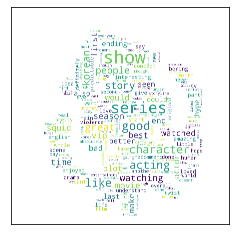

In [161]:
word_cloud = WordCloud(# 设置背景色
    background_color='white',
        # 设置背景宽
    width=600,
        # 设置背景高
    height=700,
        # 最大字体
    max_font_size=80,
        # 最小字体
    min_font_size=10,
    scale=10,
    mask=mg,
    mode='RGBA')
word_cloud.fit_words(dic)
plt.imshow(word_cloud)
plt.xticks([])#去掉横坐标
plt.yticks([])#去掉纵坐标
plt.show()

In [162]:
word_cloud.to_file('imdb内容主题部分_top100_basedon_tf值.png')

In [163]:
imdb_reviews_tail_100=tf1.sort_values(['tf'], ascending=False).tail(100)
imdb_reviews_tail_100.to_csv('imdb_内容_tail_100.csv')